# Метод опорных векторов (Support Vector Machine)

Рассмотрим задачу бинарной классификации на два непересекающихся класса в $R^n$. Тестовое множество:

$T^l =(x_i, y_i)^l_{i=1}$ &ndash; обучающая выборка 

$X \subset R^n$,
$Y=\{-1, 1\}$

Будем строить линейный классификатор:

$$a(x)=sign(\theta ^T x - \tau_0)$$

$\theta \in R^n $, $\tau_0 \in R$

Предположим, что выборка линейно-разделима, тогда существуют такие $\theta$, $\tau_0$ (то есть гиперплоскость), что классификатор не ошибается на тестовых данных. Но такая гиперплоскость не единственна. SVM находит оптимальную разделяющую гиперплоскость, то есть такую, которая максимально далека от ближайших к ней точек обоих классов.

#### Нормировка

Используя свойства скалярного произведения, мы можем умножить $\theta, \tau_0$ на одну и туже константу, при этом классификатор не изменится. Будем искать такие $\theta, \tau_0$, что:
$$ \min_{i=1,\dots,l}{y_i(\theta ^T x_i - \tau_0)} = 1 $$

#### Разделяющая полоса

Нам нужно максимизировать ширину полосы. Если нормировочное условие будет выполнено, то на границах полосы гарантировано будут точки обоих классов (иначе полосу можно расширить). Пусть это будут $x^{+}$, $x^{-}$ . Тогда ширину полосы можно выразить выражением:

$$\langle x^{+} - x^{-} - k \frac{\theta}{\lVert{\theta}\lVert} ,  \frac{\theta}{\lVert{\theta}\lVert} \rangle = 0$$

$$k = \langle x^{+} - x^{-},  \frac{\theta}{\lVert{\theta}\lVert}\rangle$$

$$= \frac{\langle \theta, x^{+} \rangle - \langle \theta, x^{-} \rangle}{\lVert{\theta}\lVert}$$

$$= \frac{(\tau_0 + 1) - (\tau_0 - 1)}{\lVert{\theta}\lVert} $$

$$= \frac{2}{\lVert{\theta}\lVert}$$

Множество точек $\{ x: -1 \le (\theta^T x - \tau_0) \le 1\}$ описывает полосу, разделяющую классы.

![конечный автомат](./images/svm.png)


То есть условия будут выглядеть так:

$$\begin{cases}
   \langle \theta, \theta \rangle \to \min \\
   y_i(\langle x_i, \theta \rangle - \tau_0)) \ge 1, && i = 1,\ldots,l
 \end{cases}
$$
 
 Это задача квадратичного программирования.
 
 #### Линейно неразделимая выборка
 
Введём дополнительные переменные, $\tau_1 \ldots \tau_l$ и константу $C$ . Переменные $\tau_i$ характиризуют величину ошибки для каждой входной переменной, условия можно переписать так:

$$\begin{cases}
   \frac{1}{2}\langle \theta, \theta \rangle + C \sum_{i=1}^{l}{\tau_i}\to \min \\
    y_i(\langle x_i, \theta \rangle - \tau_0)) \ge 1 - \tau_i, && i = 1,\ldots, l \\
    \tau_i \ge 0, && i = 1,\ldots,l 
 \end{cases}
$$


Эквивалентная задача:

$$\begin{cases}
    -\sum\limits_{i=1}^{l}{\lambda_i} + \frac{1}{2}\sum\limits_{i=1}^{l} \sum\limits_{j=1}^{l} \lambda_i \lambda_j \langle x_i, x_j \rangle \to \min_{\lambda} \\
    0 \le \lambda_i \le C, && i = 1,\ldots, l \\
    \sum\limits_{i=1}^{l}\lambda_i y_i = 0
 \end{cases}
$$

$$\theta = \sum\limits_{i=1}^{l}{\lambda_{i} y_i x_i}$$ 

Кроме того, получается три случая:
1. $\lambda_{i} = 0$ - объекты, которые лежат за пределами разделяющей полосы и классифицируются правильно. *Неинформативные* объекты. 
2. $\lambda_{i} \neq 0$ - объекты, которые лежат на границе полосы и классифицируются правильно. *Опорные граничные объекты.* 
3. $\lambda_{i} = C$ - объекты внутри полосы или объекты которые относятся к другому классу. *Опорные нарушители*.

### Ядра

Если тренировочные данные линейно неразделимы, их можно попробовать "спрямить" c помощью перехода к новому пространству $H$ при помощи некоторого преобразования $\omega: X \to H$ . Причем пространство $H$ должно быть наделено скалярным произведением. Вообще само преобразование нам не нужно, необходимо уметь считать скалярное произведение ${\langle H(x_i), H(x_j) \rangle}_H$ .

Таким образом функция $K: X \times X \to \mathbb{R}$ называется ядром, если $K(x, y) = {\langle \omega(x), \omega(y) \rangle)}_H $ , для некоторого пространства $H$ со скаларным произведением. 

Может ли функция быть ядром? На этот счет есть критерий (*Теорема Мерсера*): функция $K(x, y)$ является ядром тогда и только тогда, если она симметрична по аргументам: $K(x, y) = K(y, x)$ и неотрицательна определена, то есть для любой выборки $\{x_1, \dots, x_l\} \subset X$ матрица $K = \{K(x_i, x_j)\}_{ij}$ неотрицательно определена.

#### Распространенные  ядра

1. RBF: <br/> $\exp(-\gamma |u -v| ^2)$

2. Polynomial: <br/> $(\gamma \langle u, v\rangle + \alpha)^\beta$

3. Sigmoid: <br/> $\tanh(\gamma \langle u, v\rangle + \alpha)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from matplotlib import cm
from sklearn import svm

def draw_svm(X, Y, clf):
    clf.fit(X, Y)    
    
    minX, maxX = np.min(X[:, 0]), np.max(X[:, 0])
    minY, maxY = np.min(X[:, 1]), np.max(X[:, 1])
    
    xx, yy = np.meshgrid(np.linspace(minX, maxX, 300), 
                         np.linspace(minY, maxY, 300))
            
    zz = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.pcolormesh(xx, yy, zz.reshape(xx.shape), cmap=cm.get_cmap('Set2'))

    plt.scatter(X[Y == 0, 0], X[Y == 0, 1], alpha=0.5, c='g', s=34)
    plt.scatter(X[Y == 1, 0], X[Y == 1, 1], alpha=0.5, c='r', s=34, marker='^')        
      
    plt.contour(xx, yy, zz.reshape(xx.shape), linewidths=1, levels=[0.5])
    
    plt.xlim((minX, maxX))
    plt.ylim((minY, maxY)) 

In [3]:
data = np.load('data/svm_example_moons.npz')
X = data['X']
Y = data['Y']

draw_svm(X, Y, svm.SVC(kernel='rbf', gamma=5.))

FileNotFoundError: [Errno 2] No such file or directory: 'data/svm_example_moons.npz'

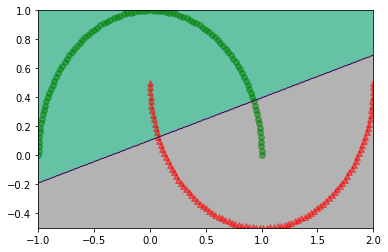

In [5]:
draw_svm(X, Y, svm.SVC(kernel='linear'))            

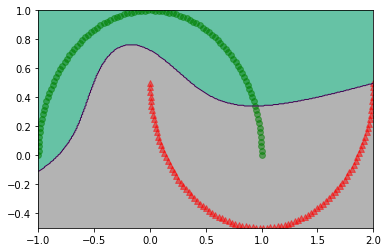

In [12]:
draw_svm(X, Y, svm.SVC(kernel='poly', degree=3, gamma=5.))

(-20, 25)

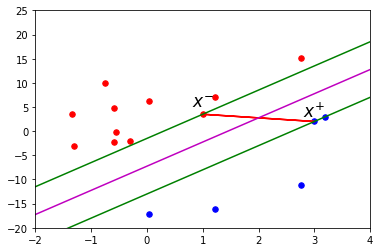

In [6]:
def gen_random_along_line(angle, offset, scale):
    return  angle * x + offset + scale * np.random.random(10)    


x = np.random.random(10) * 6. - 2.

points_0 = np.array([(1, 3.5)])
points_1 = np.array([(3, 2), (3.2, 3)])

plt.scatter(x, gen_random_along_line(5, -1., 15.), s=30, c='r')
plt.scatter(points_0[:, 0], points_0[:, 1], s=30, c='r')

plt.scatter(points_1[:, 0], points_1[:, 1], s=30, c='b')
plt.scatter(x, gen_random_along_line(5, -14., -15.), s=30, c='b')

x = np.linspace(-2, 4, 20)
plt.plot(x, 5 * x - 13, 'g')
plt.plot(x, 5 * x - 1.5, 'g')
plt.plot(x, 5 * x - 7.25, 'm')

plt.text(1, 5,
     r"$x^{-}$", horizontalalignment='center',
     fontsize=17)

plt.text(3, 3,
     r"$x^{+}$", horizontalalignment='center',
     fontsize=17)

plt.arrow(1, 3.5, 2, -1.5, fc='r', ec='r', lw=1.5)

plt.xlim((-2, 4))
plt.ylim((-20, 25))